In [169]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import  RandomForestClassifier
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [129]:
data = pd.read_csv('abalone.csv')

In [130]:
data['age'] = data['Rings']
data.drop('Rings', axis = 1, inplace = True)

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   age             4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [132]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole weight'}>,
        <AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>],
       [<AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

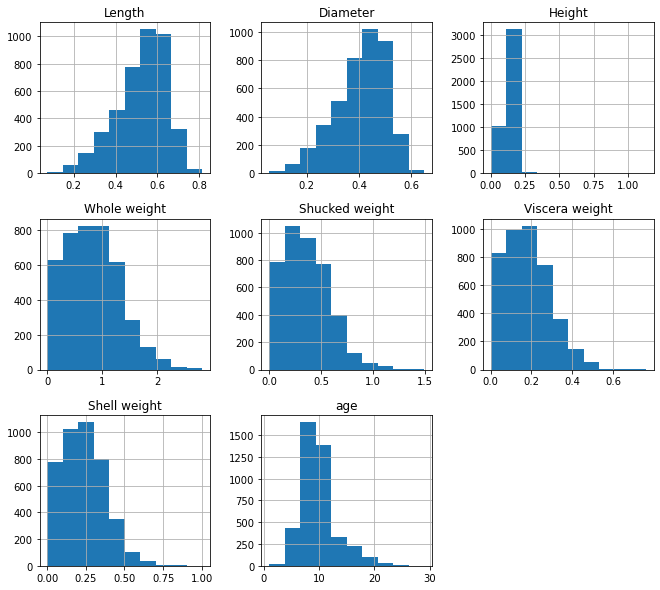

In [133]:
data.hist(figsize=(11,10), layout=(3,3))

In [134]:
num_features=data.select_dtypes(include=[np.number]).columns
catogorical_features=data.select_dtypes(include=[np.object]).columns

In [135]:
skew_values = skew(data[num_features])

In [136]:
dummy = pd.concat([pd.DataFrame(list(num_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
2,Height,3.127694
7,age,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


<AxesSubplot:xlabel='Sex', ylabel='count'>

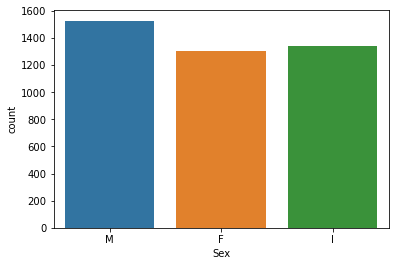

In [137]:
sns.countplot(x = 'Sex', data = data)

<AxesSubplot:>

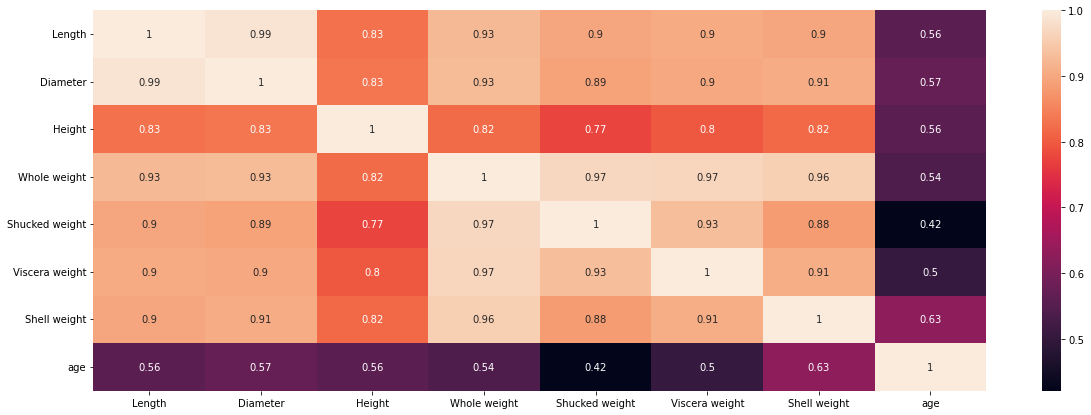

In [138]:
plt.figure(figsize=(20,7))
sns.heatmap(data[num_features].corr(), annot=True)

In [139]:
data = pd.get_dummies(data)
dummy_data = data.copy()

<AxesSubplot:>

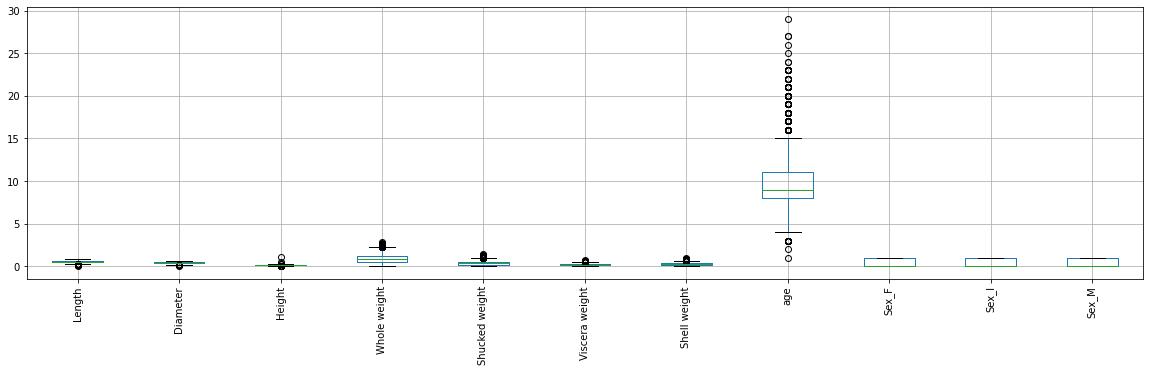

In [140]:
data.boxplot( rot = 90, figsize=(20,5))

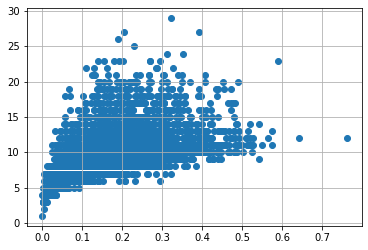

In [145]:
var = 'Viscera weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [146]:
data.drop(data[(data['Viscera weight']> 0.5) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Viscera weight']<0.5) & (data['age'] > 25)].index, inplace=True)

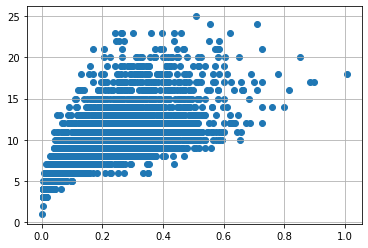

In [147]:
var = 'Shell weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [148]:
data.drop(data[(data['Shell weight']> 0.6) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Shell weight']<0.8) & (data['age'] > 25)].index, inplace=True)

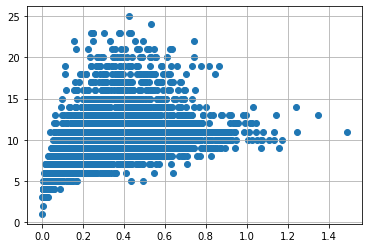

In [149]:
var = 'Shucked weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [150]:
data.drop(data[(data['Shucked weight']>= 1) & (data['age'] < 20)].index, inplace=True)
data.drop(data[(data['Shucked weight']<1) & (data['age'] > 20)].index, inplace=True)

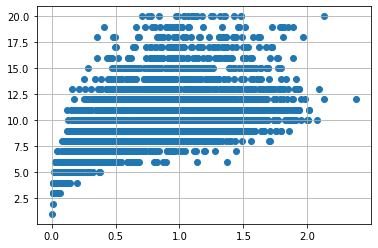

In [151]:
var = 'Whole weight'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [152]:
data.drop(data[(data['Whole weight']>= 2.5) & (data['age'] < 25)].index, inplace=True)
data.drop(data[(data['Whole weight']<2.5) & (data['age'] > 25)].index, inplace=True)

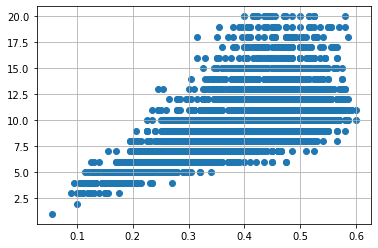

In [153]:
var = 'Diameter'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [154]:
data.drop(data[(data['Diameter']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Diameter']<0.6) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Diameter']>=0.6) & (data['age']< 25)].index, inplace=True)

In [ ]:
var = 'Height'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)

In [155]:
data.drop(data[(data['Height']>0.4) & (data['age'] < 15)].index, inplace=True)
data.drop(data[(data['Height']<0.4) & (data['age'] > 25)].index, inplace=True)

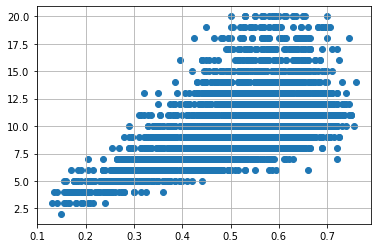

In [156]:
var = 'Length'
plt.scatter(x = data[var], y = data['age'],)
plt.grid(True)


In [157]:
data.drop(data[(data['Length']<0.1) & (data['age'] < 5)].index, inplace=True)
data.drop(data[(data['Length']<0.8) & (data['age'] > 25)].index, inplace=True)
data.drop(data[(data['Length']>=0.8) & (data['age']< 25)].index, inplace=True)

In [158]:
X = data.drop('age', axis = 1)
y = data['age']

In [159]:
standardScale = StandardScaler()
standardScale.fit_transform(X)

selectkBest = SelectKBest()
X_new = selectkBest.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.25)

In [164]:
pred=RandomForestClassifier(random_state=60)

In [165]:
pred.fit(X_train,y_train)

RandomForestClassifier(random_state=60)

In [166]:
pred.score(X_test,y_test)

0.25863770977295164

In [167]:
parameter={'n_estimators':[100,120,145,177,180],
          'criterion':["gini","entropy"],
          'max_depth':range(2,10,2),
          'min_samples_leaf':range(2,10,2),
          'min_samples_split':range(2,10,2),
          'max_features':['auto','log2']}

In [170]:
G_search=GridSearchCV(estimator=pred,param_grid=parameter,cv=3,n_jobs = -1, verbose = 2)

In [171]:
G_search.fit(X_train,y_train)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


C:\Users\dell\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=60), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 2),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': range(2, 10, 2),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 120, 145, 177, 180]},
             verbose=2)

In [172]:
G_search.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'n_estimators': 100}

In [173]:
pred=RandomForestClassifier(criterion='entropy',
 max_depth=8,
 max_features='auto',
 min_samples_leaf=8,
 min_samples_split=2,
 n_estimators=100,random_state=60)

In [174]:
pred.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=8,
                       random_state=60)

In [175]:
pred.score(X_train,y_train)

0.4884716732542819

In [176]:
pred.predict(X_test)

array([ 9,  7, 10, ..., 11, 10,  8], dtype=int64)